In [ ]:
#https://picanumeros.wordpress.com/2018/08/13/muestras-pareadas-y-muestras-independientes-diferencias-practicas/
#https://www.cienciadedatos.net/documentos/pystats11-wilcoxon-mann-whitney-u-test-python

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
from pingouin import mwu
#from scipy.stats import mannwhitneyu

In [2]:
df = pd.read_excel('datos_features.xlsx')

In [15]:
variable = df['is_humor']

humor = df[(df['is_humor'] == 1)]
no_humor = df[(df['is_humor'] == 0)]
humor['label'] = 'Humour'
no_humor['label'] = 'No humour'

h = humor.sample(n=3000,random_state=1)
nh = no_humor.sample(n=3000,random_state=1)
t = pd.concat([h,nh])

<ipython-input-15-6b347ca9b4c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humor['label'] = 'Humour'
<ipython-input-15-6b347ca9b4c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_humor['label'] = 'No humour'


# Sentimiento STANZA

In [38]:
df['sentimiento_stanza'].head()

0    0
1    1
2    0
3    1
4    1
Name: sentimiento_stanza, dtype: int64

In [18]:
j = chisquared(['sentimiento_stanza'],'Homogeneidad')

print('Homogeneidad \n', j)

Rechazo Ho
{9.521586252957801e-48}
Homogeneidad 
 None


# Polaridad media sentic

In [66]:
lista = ['polaridad_media_sentic']
estadisticos(lista)

& polaridad_media_sentic  &  2.899073888866965e-05 & 0.0349 & 0.1356 & 0.0725 & 0.128 \\


# Sentiwordnet score

In [67]:
estadisticos(['sentiwordnet_score'])

& sentiwordnet_score  &  4.55645151797456e-16 & -0.2142 & 0.4431 & -0.0654 & 0.6319 \\


# Textblob
polarity_score_textblob, subjectivity_score_textblob, tag_score_textblob

In [19]:
j = chisquared(['tag_score_textblob'],'Homogeneidad')
j

Rechazo Ho
{2.208334291787318e-27}


In [68]:
lista = ['polarity_score_textblob','subjectivity_score_textblob']
estadisticos(lista)

& polarity_score_textblob  &  2.9212043494657774e-23 & 0.0448 & 0.0751 & 0.1115 & 0.0695 \\
& subjectivity_score_textblob  &  3.769481644020236e-05 & 0.3908 & 0.0946 & 0.4206 & 0.0761 \\


# vader_score_sentiment, vader_tag_sentiment

In [7]:
#i = chisquared(['vader_tag_sentiment'],'Independencia')
j = chisquared(['vader_tag_sentiment'],'Homogeneidad')
j

Rechazo Ho
{4.958318278006278e-46}


In [8]:
lista = ['vader_score_sentiment']
estadisticos(lista)

& vader_score_sentiment_normal  &  2.9111283023928295e-42 & 0.0135 & 0.1989 & 0.1762 & 0.2479 \\


# AFINN
afinn_score_tag, afinn_score,afinn_lexicon_score

In [23]:
#i = chisquared(['afinn_score_tag'],'Independencia')
j = chisquared(['afinn_score_tag'],'Homogeneidad')
j

Rechazo Ho
{3.12027132279446e-33}


In [7]:
lista = ['afinn_score_Normalized','afinn_lexicon_score']
estadisticos(lista)

& afinn_score_Normalized  &  8.571221720785414e-36 & 0.6345 & 0.0047 & 0.6581 & 0.0065 \\
& afinn_lexicon_score  &  7.611229468257444e-35 & -0.0442 & 2.5624 & 0.4478 & 2.284 \\


# ANEW
label_anew, sentiment_anew, arousal_anew, dominance_anew

In [25]:
#i = chisquared(['label_anew'],'Independencia')
j = chisquared(['label_anew'],'Homogeneidad')
j

Rechazo Ho
{1.0995696318932535e-15}


In [71]:
lista = ['sentiment_anew','dominance_anew','arousal_anew']
estadisticos(lista)

& sentiment_anew  &  1.9135957271072164e-17 & 5.6939 & 0.2508 & 5.7967 & 0.3504 \\
& dominance_anew  &  1.553553161272202e-23 & 5.5102 & 0.1188 & 5.5899 & 0.1806 \\
& arousal_anew  &  0.023689305266312632 & 4.1182 & 0.1348 & 4.0981 & 0.1628 \\


# Lexicon-of-abusive-words
abusive_scores_binary,abusive_scores

In [8]:
lista = ['abusive_scores_binary','abusive_scores']
estadisticos(lista)

& abusive_scores_binary  &  0.00010456219421738078 & 0.0013068624664544202 & 7.644905578073718e-05 & 0.0007460817769192915 & 6.0047752158546414e-05 \\
& abusive_scores  &  5.705368859084933e-17 & -0.4227829080432855 & 0.9145675298695313 & -0.6112456926783459 & 0.7633654754967459 \\


# Emosenticnet

In [73]:
lista = ['anger_frequency_EmoSenticNet','fear_frequency_EmoSenticNet', 'joy_frequency_EmoSenticNet',
       'sad_frequency_EmoSenticNet','surprise_frequency_EmoSenticNet']
estadisticos(lista)

& anger_frequency_EmoSenticNet  &  4.64087387798252e-06 & 0.0117 & 0.0007 & 0.0144 & 0.0008 \\
& fear_frequency_EmoSenticNet  &  0.00019942123788916917 & 0.0116 & 0.0008 & 0.0144 & 0.0009 \\
& joy_frequency_EmoSenticNet  &  2.2481491104176765e-30 & 0.3125 & 0.013 & 0.3481 & 0.0138 \\
& sad_frequency_EmoSenticNet  &  2.122147869310886e-05 & 0.0438 & 0.0026 & 0.051 & 0.0034 \\
& surprise_frequency_EmoSenticNet  &  4.8051577262030194e-21 & 0.0482 & 0.0041 & 0.0297 & 0.0017 \\


# SentiSense

In [74]:
lista = ['anger_frequency_SentiSense','anticipation_frequency_SentiSense','disgust_frequency_SentiSense',
'fear_frequency_SentiSense','joy_frequency_SentiSense','like_frequency_SentiSense',
'love_frequency_SentiSense','sadness_frequency_SentiSense']

estadisticos(lista)

& anticipation_frequency_SentiSense  &  2.0769694815484188e-15 & 0.0124 & 0.0007 & 0.0184 & 0.0011 \\
& disgust_frequency_SentiSense  &  0.00028710662246260606 & 0.032 & 0.0018 & 0.0274 & 0.0016 \\
& joy_frequency_SentiSense  &  0.03159839952397891 & 0.0073 & 0.0004 & 0.0087 & 0.0008 \\
& like_frequency_SentiSense  &  5.467444607777094e-18 & 0.0261 & 0.0015 & 0.0362 & 0.0025 \\
& love_frequency_SentiSense  &  1.233118120222646e-13 & 0.0051 & 0.0003 & 0.0096 & 0.0007 \\
& sadness_frequency_SentiSense  &  0.0011619213840446403 & 0.0045 & 0.0003 & 0.003 & 0.0002 \\


# Social and categories groups

In [76]:
lista = [
'national_groups',
'Age_groups',
'Ethinc',
 'Professional_and_class_groups',
 'Sexual_Categories',
 'Women',
 'Religion',
 'Style_of_life',
 'Non_normative'
]
estadisticos(lista)

& national_groups  &  7.691467706670097e-15 & 0.0023 & 0.0002 & 0.0003 & 0.0 \\
& Ethinc  &  2.3975932519212824e-08 & 0.001 & 0.0001 & 0.0001 & 0.0 \\
& Women  &  0.0071021700605428 & 0.0004 & 0.0 & 0.0 & 0.0 \\
& Religion  &  2.7220949643950255e-13 & 0.0019 & 0.0001 & 0.0001 & 0.0 \\
& Non_normative  &  0.0013195996574235428 & 0.0003 & 0.0 & 0.0 & 0.0 \\


# POS features

In [77]:
# Test de homogeneidad

lista = ['noun_frequency',
 'pronoun_frequency',
 'adverbs_frequency',
 'adjective_frequency',
 'punctuation_symbols_stanza_tagger',
 'primera_plural_stanza',
 'segunda_plural_stanza',
 'tercera_plural_stanza',
 'primera_singular_stanza',
 'segunda_singular_stanza',
 'tercera_singular_stanza'
    ]
lista2 = ['noun_frequency',
 'pronoun_frequency',
 'adverbs_frequency',
 'adjective_frequency',
 'punctuation_symbols_stanza_tagger',
 'primera_plural_stanza',
# 'segunda_plural_stanza',
 'tercera_plural_stanza',
 'primera_singular_stanza',
 'segunda_singular_stanza',
 'tercera_singular_stanza'
    ]

estadisticos(lista2)

& pronoun_frequency  &  1.3560567811654798e-30 & 0.0673 & 0.0022 & 0.0547 & 0.0023 \\
& adverbs_frequency  &  0.0010031451435357482 & 0.0526 & 0.003 & 0.0582 & 0.0036 \\
& adjective_frequency  &  7.496858103114344e-05 & 0.0901 & 0.0046 & 0.0973 & 0.0052 \\
& punctuation_symbols_stanza_tagger  &  7.529620454655445e-14 & 0.1119 & 0.0041 & 0.1061 & 0.0068 \\
& primera_plural_stanza  &  2.6547779840142565e-20 & 0.0022 & 0.0001 & 0.0065 & 0.0005 \\
& primera_singular_stanza  &  5.948099172790256e-119 & 0.0318 & 0.002 & 0.0111 & 0.001 \\
& segunda_singular_stanza  &  6.11698001489432e-11 & 0.0008 & 0.0001 & 0.0028 & 0.0002 \\
& tercera_singular_stanza  &  0.008692239967841076 & 0.0121 & 0.0007 & 0.0112 & 0.0008 \\


# Hurtlex

In [5]:
lista =['Hurtlex-negative-stereotypes-ethnic-slurs',
 'Hurtlex-professions-and-occupations',
 'Hurtlex-physical-disabilities-and-diversity',
 'Hurtlex-cognitive disabilities-and-diversity',
 'Hurtlex-moral-and-behavioral-defects',
 'Hurtlex-words-social-economic-disadvantage',
 'Hurtlex-plants',
 'Hurtlex-animals',
 'Hurtlex-male-genitalia',
 'Hurtlex-female-genitalia',
 'Hurtlex-potential-negative-connotations',
 'Hurtlex-derogatory-words',
 'Hurtlex-felonies-crime-immoral-behavior',
 'Hurtlex-word-seven-deadly-sins-of-the-Christian-tradition']

estadisticos(lista)
    
l = ['Hurtlex-locations-and-demonyms','Hurtlex-words-prostitution',
     'Hurtlex-words-homosexuality']


& Hurtlex-negative-stereotypes-ethnic-slurs  &  1.5334769827015134e-22 & 0.00427270632370492 & 0.00032161121590705696 & 0.0006812499091422759 & 3.3935659851079795e-05 \\
& Hurtlex-physical-disabilities-and-diversity  &  8.200947414675782e-05 & 0.0025003862877166732 & 0.00014258041346169964 & 0.0015930293762791855 & 0.00017705195515089827 \\
& Hurtlex-words-social-economic-disadvantage  &  0.0033830030584591484 & 0.0013470471127142562 & 7.975066563074379e-05 & 0.0022893225352226382 & 0.0001638335391162566 \\
& Hurtlex-plants  &  0.013502688768575992 & 0.0025861894194328036 & 0.00017925679682326515 & 0.0014307133564214626 & 8.418905988690514e-05 \\
& Hurtlex-animals  &  2.228814619351844e-06 & 0.0038722484298447882 & 0.0002548476279571215 & 0.0020898649357723635 & 0.00013408300511822758 \\
& Hurtlex-male-genitalia  &  5.626912702427271e-32 & 0.028663058314306173 & 0.0016136928260646762 & 0.017902620760417796 & 0.001133748716016898 \\
& Hurtlex-female-genitalia  &  1.4057015970218436e-09 

In [13]:
stats.spearmanr(h['Hurtlex-negative-stereotypes-ethnic-slurs'],h['PsicoLIWCfamily'])

SpearmanrResult(correlation=-0.039334171659352477, pvalue=0.03121217386218478)

# LIWC

In [82]:
cols = []
d=list(df.columns)
for i in range(len(d)):
    if d[i].startswith('PsicoLIWC'):
        cols.append(d[i])
    else:
        i+=1

In [80]:
estadisticos(cols)

& PsicoLIWCachieve  &  4.703538223660354e-40 & 0.0168 & 0.001 & 0.0305 & 0.0022 \\
& PsicoLIWCadverb  &  5.4611801496764367e-05 & 0.0417 & 0.0022 & 0.0386 & 0.0024 \\
& PsicoLIWCaffect  &  5.034507367899896e-31 & 0.0564 & 0.0037 & 0.0779 & 0.0061 \\
& PsicoLIWCanger  &  1.1007623587870109e-08 & 0.0114 & 0.0007 & 0.0082 & 0.0007 \\
& PsicoLIWCanx  &  9.415058568484061e-07 & 0.003 & 0.0002 & 0.0054 & 0.0004 \\
& PsicoLIWCarticle  &  2.9922946317077092e-36 & 0.0805 & 0.0041 & 0.06 & 0.0033 \\
& PsicoLIWCassent  &  0.017066571443263266 & 0.0059 & 0.0004 & 0.0054 & 0.0006 \\
& PsicoLIWCauxverb  &  0.0006662940590939491 & 0.093 & 0.0031 & 0.0903 & 0.0045 \\
& PsicoLIWCbio  &  0.005176680220390262 & 0.0464 & 0.0034 & 0.0442 & 0.0042 \\
& PsicoLIWCbody  &  1.3164494735026512e-05 & 0.0164 & 0.0012 & 0.0134 & 0.0011 \\
& PsicoLIWCcertain  &  2.680187637592461e-14 & 0.0113 & 0.0006 & 0.0182 & 0.0013 \\
& PsicoLIWCcogmech  &  4.4259208927309723e-41 & 0.1267 & 0.007 & 0.1619 & 0.0101 \\
& PsicoLIWC

In [47]:
list(df.columns)

['id',
 'text',
 'is_humor',
 'humor_rating',
 'humor_controversy',
 'offense_rating',
 'texto_limpio',
 'sentimiento_stanza',
 'polaridad_media_sentic',
 'sentiwordnet_score',
 'sentiwordnet_overall_Sentiment',
 'afinn_lexicon_score',
 'afinn_score',
 'afinn_score_tag',
 'vader_score_sentiment',
 'vader_tag_sentiment',
 'polarity_score_textblob',
 'tag_score_textblob',
 'subjectivity_score_textblob',
 'sentiment_anew',
 'arousal_anew',
 'dominance_anew',
 'label_anew',
 'abusive_scores',
 'abusive_scores_binary',
 'anger_frequency_EmoSenticNet',
 'disgust_frequency_EmoSenticNet',
 'fear_frequency_EmoSenticNet',
 'joy_frequency_EmoSenticNet',
 'sad_frequency_EmoSenticNet',
 'surprise_frequency_EmoSenticNet',
 'anger_frequency_SentiSense',
 'anticipation_frequency_SentiSense',
 'disgust_frequency_SentiSense',
 'fear_frequency_SentiSense',
 'joy_frequency_SentiSense',
 'like_frequency_SentiSense',
 'love_frequency_SentiSense',
 'sadness_frequency_SentiSense',
 'surprise_frequency_SentiSe

Text(0.5, 1.0, 'Non Humour')

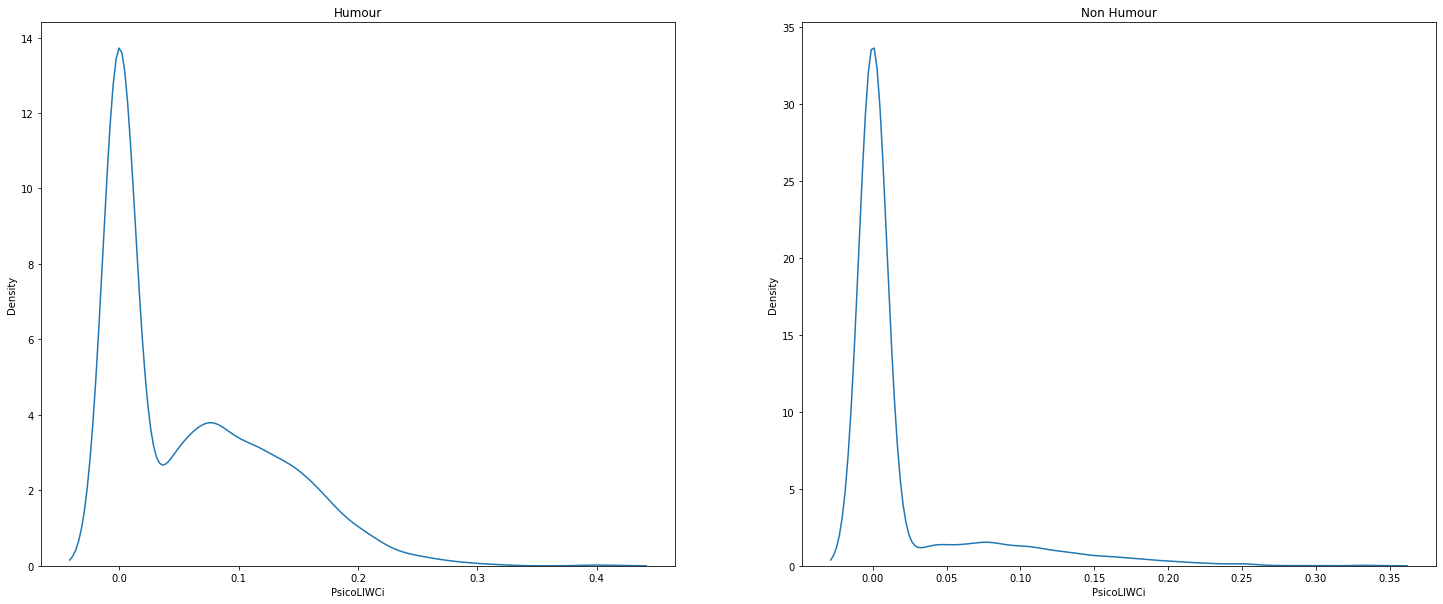

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

sns.kdeplot(data=h, x ='PsicoLIWCi',ax=axs[0]).set_title('Humour')
sns.kdeplot(data=nh, x = 'PsicoLIWCi',ax=axs[1]).set_title('Non Humour')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'I')

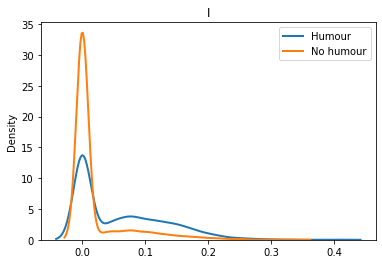

In [16]:
lista = ['Humour', 'No humour']
#_, axes = plt.subplots(figsize=(15,10))

for l in lista:
    
    subset = t[t['label'] == l]
    x = sns.distplot(subset['PsicoLIWCi'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = l)
    
x.legend(prop={'size': 10})
x.set(xlabel=None)
x.set_title('I')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

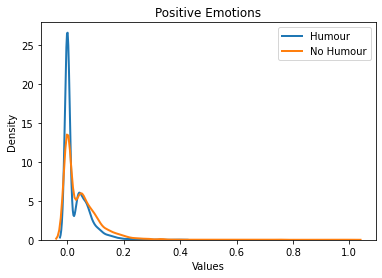

In [16]:
lista = ['Humour', 'No Humour']

for l in lista:
    
    if l == 'Humour':
        sns.distplot(h['PsicoLIWCposemo'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'Humour')
    else:
        sns.distplot(nh['PsicoLIWCposemo'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'No Humour')
    
plt.legend(prop={'size': 10})
plt.title('Positive Emotions')
plt.xlabel('Values')
plt.ylabel('Density')

/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luciainesmerlo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

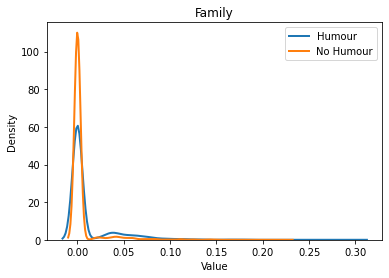

In [17]:
lista = ['Humour', 'No Humour']

for l in lista:
    
    if l == 'Humour':
        sns.distplot(h['PsicoLIWCfamily'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'Humour')
    else:
        sns.distplot(nh['PsicoLIWCfamily'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'No Humour')
    
plt.legend(prop={'size': 10})
plt.title('Family')
plt.xlabel('Value')
plt.ylabel('Density')

#### Funciones

In [4]:
def chisquared(lista, method):
   # dic = {}
    if method == 'Homogeneidad':
        variable = t['is_humor']
        for i in lista:
    
            crosstab = pd.crosstab(variable,t[i])
            chi2, pvalue, dof, expected = stats.chi2_contingency(crosstab)
            
            if pvalue<0.05:
                print('Rechazo Ho')
                if type(i) is int or i in ('0','1','2'):
                    print({pvalue},'&',round(h[i].mean(),2),'&', round(h[i].var(),2),'&',
                      round(nh[i].mean(),2),'&',round(nh[i].var(),2),'\\\\') 
                else:
                    print({pvalue})

In [4]:
def estadisticos(lista):
    alpha = 0.05
    for i in lista:
        
        a1 = np.array(h.loc[:,i])
        a2 = np.array(nh.loc[:,i])
        corr, pvalue = stats.spearmanr(a1,a2) #veo si las muestras están pareadas
        
        if pvalue > alpha:
            try:
                mannwhitney = mwu(h[i], nh[i])
                if (mannwhitney['p-val'] < 0.05).all():
                    
                    print('&', i ,' & ', mannwhitney['p-val'].values[0],'&',
                        h[i].mean(),'&', h[i].var(),'&',
                          nh[i].mean(),'&',nh[i].var(),'\\\\')  
                    #round(h[i].mean(),4),'&', round(h[i].var(),4),'&',
                      #round(nh[i].mean(),4),'&',round(nh[i].var(),4),'\\\\')
            
            except ValueError:
                i += 1
                
        else:
            try:
                wilcoxon = pg.wilcoxon(h[i], nh[i])
                if (wilcoxon['p-val'] < 0.05).all():
                    
                    print('&', i ,' & ', wilcoxon['p-val'].values[0],'&',
                      h[i].mean(),'&', h[i].var(),'&',
                          nh[i].mean(),'&',nh[i].var(),'\\\\')  
                    #round(h[i].mean(),4),'&', round(h[i].var(),4),'&',
                      #round(nh[i].mean(),4),'&',round(nh[i].var(),4),'\\\\')
            except ValueError:
                i += 1

In [6]:
def names(lista):
    alpha = 0.05
    for i in lista:
        
        a1 = np.array(h.loc[:,i])
        a2 = np.array(nh.loc[:,i])
        corr, pvalue = stats.spearmanr(a1,a2) #veo si las muestras están pareadas
        
        if pvalue > alpha:
            try:
                mannwhitney = mwu(h[i], nh[i])
                if (mannwhitney['p-val'] < 0.05).all():
                    
                    print(i)
            
            except ValueError:
                i += 1
                
        else:
            try:
                wilcoxon = pg.wilcoxon(h[i], nh[i])
                if (wilcoxon['p-val'] < 0.05).all():
                    print(i)
                    
            except ValueError:
                i += 1